<div style="border:solid Chocolate 2px; padding: 40px">

Привет, меня зовут Александр Куимов. Я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

**Пожалуйста, не удаляй мои комментарии**, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими по шаблону, показанному чуть ниже. Это нужно, чтобы не создавалась путаница😉 

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
    
<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> В такой цветовой ячейке я прошу тебя оставлять свои комментарии. Если исправляешь проект на второй итерации и выше, не забывай пожалуйста указывать номер итерации, например, "Комментарий студента v.2".
</div> 

<br/>    
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе датасаентистом. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

In [1]:
from sklearn.metrics import mean_squared_error
!pip install --upgrade scikit-learn --quiet
!pip install phik --quiet

In [2]:
import pandas as pd
import phik
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
import numpy as np
import time

In [3]:
RANDOM_STATE = 42

## Подготовка данных

In [4]:
autos = pd.read_csv('https://code.s3.yandex.net/datasets/autos.csv')

In [5]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [6]:
autos.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


#### Промежуточный вывод <br>
Данные загружены. Есть пропуски, обработаем их в пайплайне.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:  </b> 
    
С данными познакомились, проведен первичный аналитический осмотр!) Полученная информация поможет нам в дальнейшем с предобработкой данных

### Обработка данных

In [7]:
# Разобьём даты на отдельные признаки (год, месяц, день)
autos['DateCrawled'] = pd.to_datetime(autos['DateCrawled'])
autos['DateCreated'] = pd.to_datetime(autos['DateCreated'])
autos['LastSeen'] = pd.to_datetime(autos['LastSeen'])

autos['DateCrawled_year'] = autos['DateCrawled'].dt.year
autos['DateCrawled_month'] = autos['DateCrawled'].dt.month
autos['DateCrawled_day'] = autos['DateCrawled'].dt.day

autos['DateCreated_year'] = autos['DateCreated'].dt.year
autos['DateCreated_month'] = autos['DateCreated'].dt.month
autos['DateCreated_day'] = autos['DateCreated'].dt.day

autos['LastSeen_year'] = autos['LastSeen'].dt.year
autos['LastSeen_month'] = autos['LastSeen'].dt.month
autos['LastSeen_day'] = autos['LastSeen'].dt.day

autos = autos.drop(['DateCrawled', 'DateCreated', 'LastSeen'], axis=1)
autos

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,...,PostalCode,DateCrawled_year,DateCrawled_month,DateCrawled_day,DateCreated_year,DateCreated_month,DateCreated_day,LastSeen_year,LastSeen_month,LastSeen_day
0,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,...,70435,2016,3,24,2016,3,24,2016,4,7
1,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,...,66954,2016,3,24,2016,3,24,2016,4,7
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,...,90480,2016,3,14,2016,3,14,2016,4,5
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,...,91074,2016,3,17,2016,3,17,2016,3,17
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,...,60437,2016,3,31,2016,3,31,2016,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,...,2694,2016,3,21,2016,3,21,2016,3,21
354365,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,...,39576,2016,3,14,2016,3,14,2016,4,6
354366,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,...,26135,2016,3,5,2016,3,5,2016,3,11
354367,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,...,87439,2016,3,19,2016,3,19,2016,4,7


In [8]:
# Полные дубликаты
print('Дубликатов в данных:', autos.duplicated().sum())

# Удалим полные дубликаты
autos = autos.drop_duplicates().reset_index(drop=True)

Дубликатов в данных: 6828


In [9]:
# Проверка на опечатки в названиях столбцов (категориальные признаки)

categorical_columns = autos.select_dtypes(include='object').columns

for column in autos[categorical_columns]:
    print(column, autos[column].unique())
    print("--------------------")

VehicleType [nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']
--------------------
Gearbox ['manual' 'auto' nan]
--------------------
Model ['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'other' 'c_max' '3_reihe'
 'passat' 'navara' 'ka' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er'
 'meriva' 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio'
 'kadett' 'kangoo' 'corsa' 'one' 'fortwo' '1er' 'b_klasse' 'signum'
 'astra' 'a8' 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156'
 'escort' 'forester' 'xc_reihe' 'scenic' 'a4' 'a1' 'insignia' 'combo'
 'focus' 'tt' 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' '100' 'z_reihe'
 'sportage' 'sorento' 'v40' 'ibiza' 'mustang' 'eos' 'touran' 'getz' 'a3'
 'almera' 'megane' 'lupo' 'r19' 'zafira' 'caddy' 'mondeo' 'cordoba' 'colt'
 'impreza' 'vectra' 'berlingo' 'tiguan' 'i_reihe' 'espace' 'sharan'
 '6_reihe' 'panda' 'up' 'seicento' 'ceed' '5_reihe' 'yeti' 'octavia' 'mii'
 'rx_reihe' '6er' 'modus' 'fox' 'matiz' 'beetle' 'c1'

#### Промежуточный вывод <br>
Опечаток нет. Признаки в порядке.

#### Анализ признаков

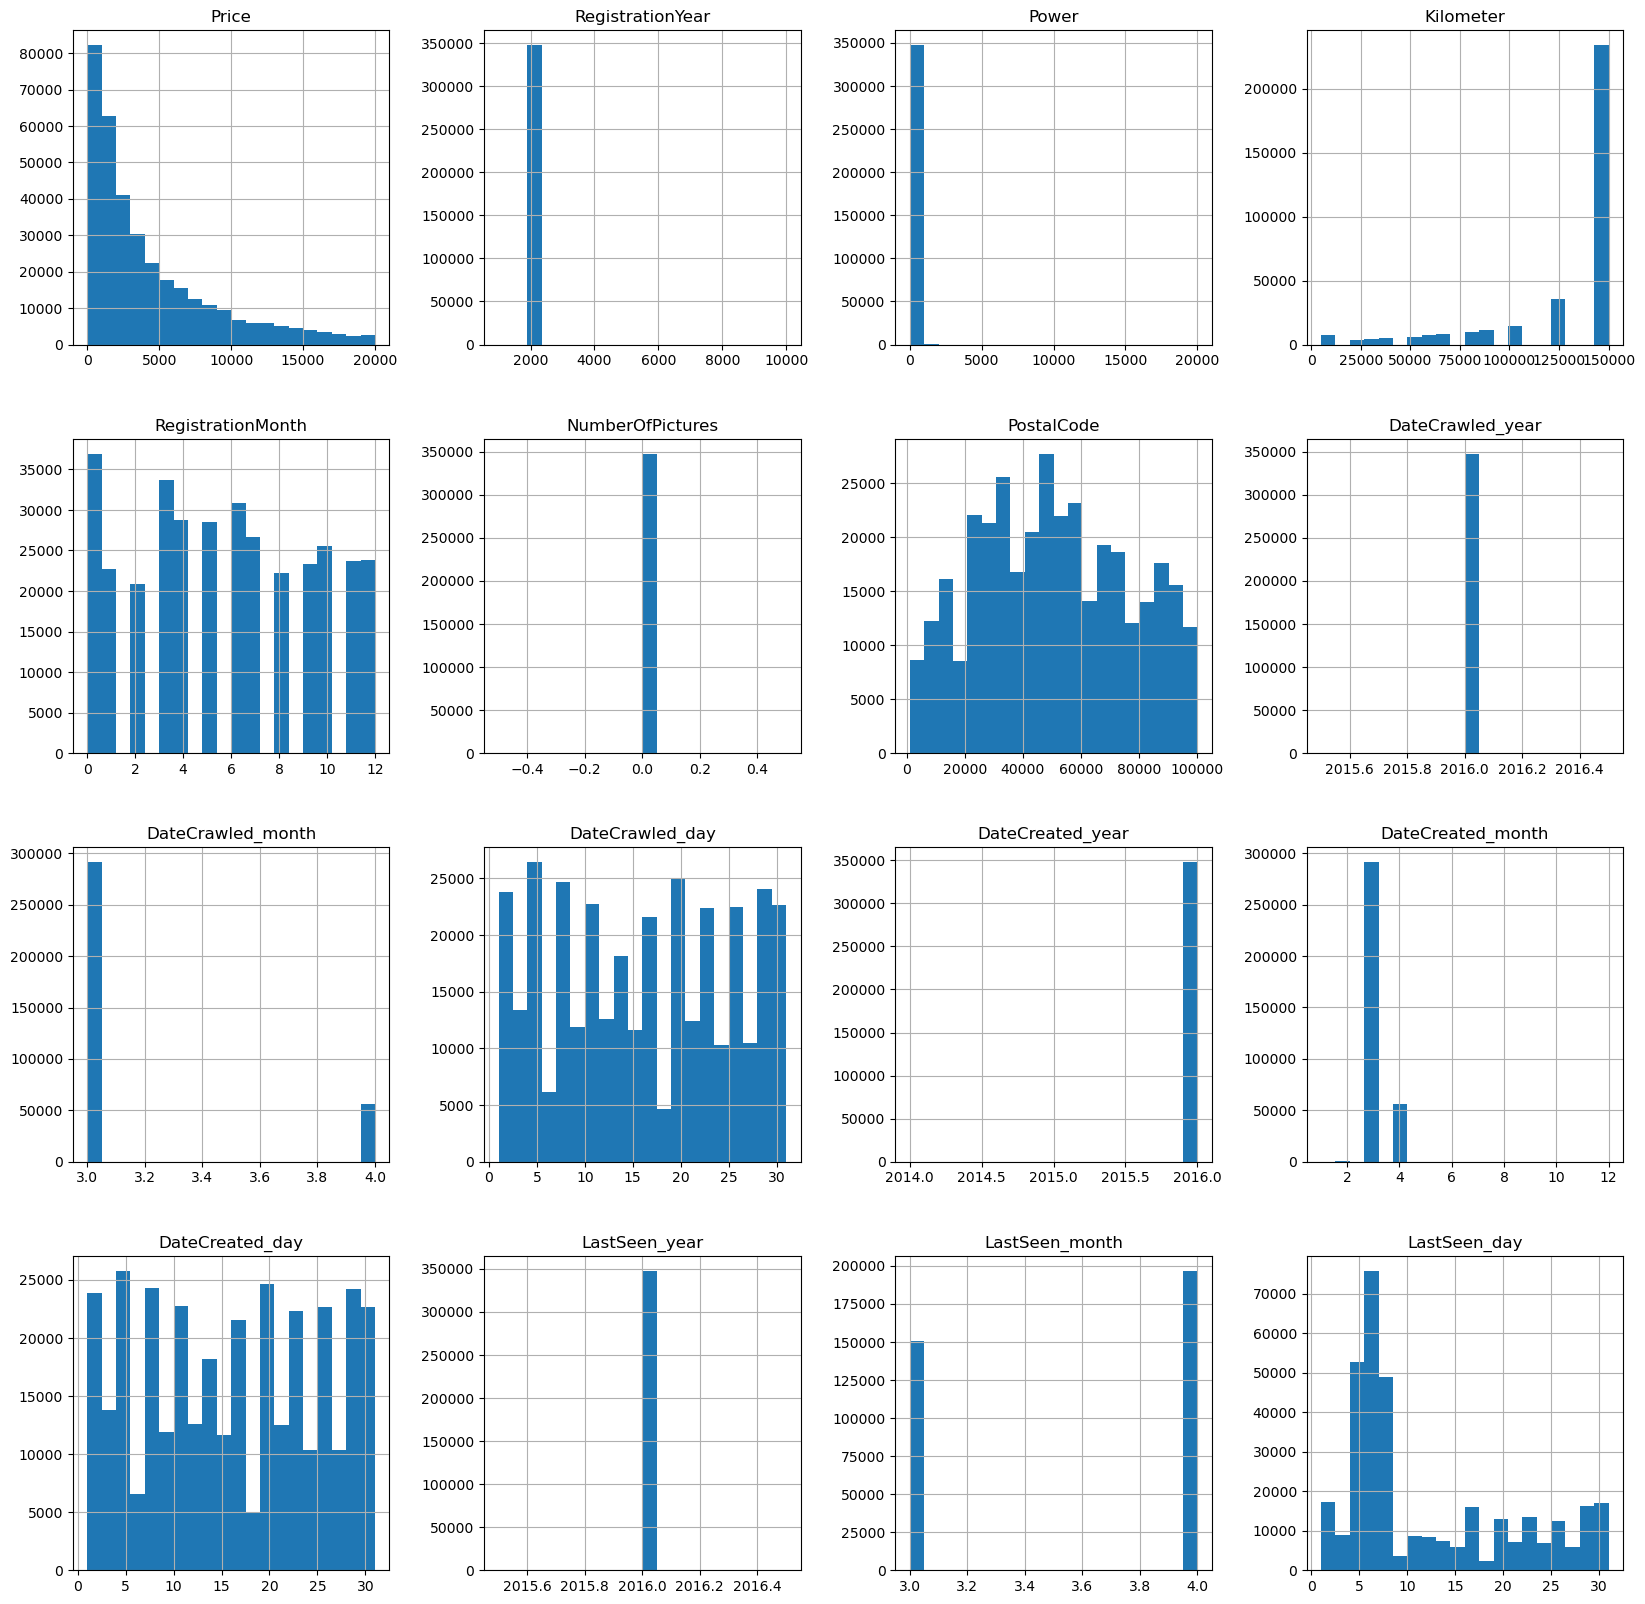

In [10]:
autos.hist(figsize=(20, 20), bins=20);

In [11]:
print(autos['NumberOfPictures'].value_counts())

autos = autos.drop('NumberOfPictures', axis=1)

NumberOfPictures
0    347541
Name: count, dtype: int64


In [12]:
autos = autos.drop('PostalCode', axis=1)

In [13]:
# Удалим выбросы в годах регистрации и сборе данных
autos = autos[(autos['RegistrationYear'] >= 1900) & (autos['RegistrationYear'] <= 2016)]

autos = autos[autos['DateCrawled_year'] <= 2016]

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b>Оставляем данные до 2016 года, потому что за более новые года недостаточно данных?
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Это ошибочные данные из будущего, т.к. датасет был сформирован в 2016 году, мы работаем именно с ним    

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b> 
        
Год регистрации следует ограничить сверху 2016 годом, причем 2016 должен остаться в датафрейме (<=2016). Максимальный год — год выгрузки (date_crawled) - 2016.
 

#### Ящики с усами для мощности

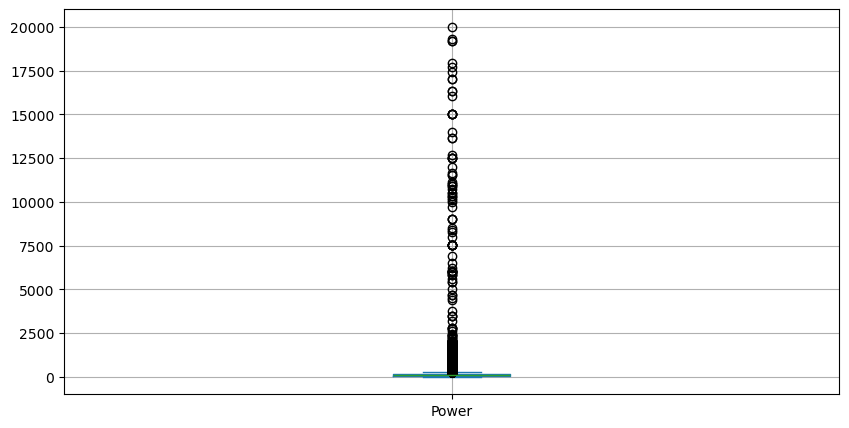

In [14]:
autos['Power'].plot(kind='box', grid=True, figsize=(10, 5));

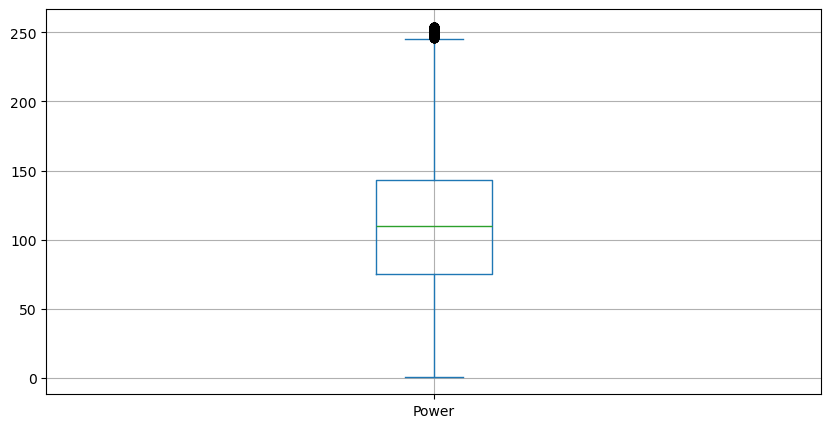

In [15]:
Q1 = autos['Power'].quantile(0.25)
Q3 = autos['Power'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

autos = autos[(autos['Power'] >= lower_bound) & (autos['Power'] <= upper_bound)]
autos = autos[autos['Power'] != 0]

autos['Power'].plot(kind='box', grid=True, figsize=(10, 5));

#### Промежуточный вывод <br>
Удалили выбросы в мощности двигателя. Оставили значения в диапазоне от Q1 - 1.5 * IQR до Q3 + 1.5 * IQR.
(Мощность двигателя не может быть равна 0, поэтому удалим такие значения)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>

Здесь еще предполагается удалить объекты с неккоректными значениями у мощности.
        
Рекомендую построить ящики с усами для корректного отсечения аномалий. 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Интересно, авто с нулевой мощностью могут быть без двигателя?

Удалим нулевые цены. Удалим цены меньше 5 евро, для надежности

In [16]:
autos = autos[autos['Price'] >= 5]

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b> 
    
Нулевые цены нужно  удалить, т.к. заказчик совсем не работает с нулевой ценой.
    
Самое интересное, что на нескольких сайтов по продажам подержанных автомобилей в Германии (страну можно определить по почтовым индексам, большинство из них из Германии) показало, что цены начинаются действительно с 0 и 1 евро, но это единичные объявления и не понятно, то ли это ошибка при заполнении формы, то ли машины на металлолом.    

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

#### Промежуточный вывод <br>
NumberOfPictures - признак, который не несет информации. Удалим его. <br>
PostalCode - не влияет на стоимость автомобиля. Удалим его. <br>
Power - удалили выбросы. <br>
Price - удалили нулевые цены и цены меньше 5 евро.


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
        
Молодец, что замечаешь неважные, константный признак (ниже по проекту) и удаляешь их)

### Матрица корреляции

In [17]:
autos.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCrawled_year,DateCrawled_month,DateCrawled_day,DateCreated_year,DateCreated_month,DateCreated_day,LastSeen_year,LastSeen_month,LastSeen_day
1,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016,3,24,2016,3,24,2016,4,7
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016,3,14,2016,3,14,2016,4,5
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016,3,17,2016,3,17,2016,3,17
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016,3,31,2016,3,31,2016,4,6
5,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016,4,4,2016,4,4,2016,4,6


In [18]:
corr_cols = ['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Model', 'Kilometer', 'FuelType', 'Brand', 'Repaired']
autos[corr_cols].phik_matrix()

interval columns not set, guessing: ['Price', 'RegistrationYear', 'Power', 'Kilometer']


,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
Price,1.000000,0.262237,0.600979,0.296433,0.514067,0.577173,0.325369,0.269957,0.351021,0.362796
VehicleType,0.262237,1.000000,0.163581,0.262716,0.506609,0.921063,0.177497,0.331509,0.634172,0.077905
RegistrationYear,0.600979,0.163581,1.000000,0.077175,0.318516,0.592481,0.326192,0.215998,0.342815,0.163387
Gearbox,0.296433,0.262716,0.077175,1.000000,0.557717,0.619702,0.018252,0.159776,0.501782,0.036365
Power,0.514067,0.506609,0.318516,0.557717,1.000000,0.844590,0.133433,0.320623,0.691712,0.089757
Model,0.577173,0.921063,0.592481,0.619702,0.844590,1.000000,0.446076,0.559209,0.998398,0.148137
Kilometer,0.325369,0.177497,0.326192,0.018252,0.133433,0.446076,1.000000,0.152284,0.277340,0.109767
FuelType,0.269957,0.331509,0.215998,0.159776,0.320623,0.559209,0.152284,1.000000,0.331235,0.038786
Brand,0.351021,0.634172,0.342815,0.501782,0.691712,0.998398,0.277340,0.331235,1.000000,0.094619
Repaired,0.362796,0.077905,0.163387,0.036365,0.089757,0.148137,0.109767,0.038786,0.094619,1.000000


Brand и Model имеют слишком высокую корреляцию. Удалим один из признаков.

In [19]:
autos = autos.drop('Model', axis=1)

## Обучение моделей

<br/>
<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
<b>Справочная информация:</b>    

Чтобы все было ясно, напишу конкретный план (структуру) обучения и анализа моделей:

1. Обучение моделей. В обучении нужно рассмотреть хотя бы одну простую модель и один бустинг. Подбор гиперпараметров нужно провести хотя бы одной модели. Тут есть два варианта:
    - без валидационной выборки. Здесь нужно подбирать гиперпараметры с помощью кросс-валидации (GridSearchCV, RandomizedSearchCV или вручную (cross_val_score));
    - валидационная выборка есть. Здесь можно не использовать кросс-валидацию и подбирать гиперпараметры вручную.  
2. Анализ моделей. После нахождения лучших гиперпараметров стоит измерить время обучения, предсказания и RMSE. Тут тоже есть два варианта:
    - без валидационной выборки. RMSE на кросс-валидации. Время обучения = время model.fit(X_train). Время предсказания  = model.predict(X_train);
    - валидационная выборка есть. RMSE на validation. Время обучения = время model.fit(X_train). Время предсказания = время model.predict(X_valid).  
    
    После этого напиши вывод по анализу (можешь также результаты моделей занести в общую таблицу) и посоветуй заказчику одну модель на основе его критериев;
3. Тестирование. Рассчитай финальную метрику лучшей модели на тестовой выборке (до этого тестовая выборка нигде не должна использоваться!). RMSE должно быть меньше 2500. Если метрика не дотягивает, попробуй исправить мои замечания, также можешь потюнить гиперпараметры (на этапе обучения моделей, не на тестовой выборке!)
</div>

In [20]:
X = autos.drop('Price', axis=1)
y = autos['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

X_train: (212538, 18)
y_train: (212538,)


In [21]:
X_train.columns

Index(['VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Kilometer',
       'RegistrationMonth', 'FuelType', 'Brand', 'Repaired',
       'DateCrawled_year', 'DateCrawled_month', 'DateCrawled_day',
       'DateCreated_year', 'DateCreated_month', 'DateCreated_day',
       'LastSeen_year', 'LastSeen_month', 'LastSeen_day'],
      dtype='object')

In [22]:
binary_columns = ['Gearbox', 'Repaired']
ohe_columns = ['VehicleType', 'FuelType', 'Brand']
num_columns = [
    'RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth',
    'DateCrawled_year', 'DateCrawled_month', 'DateCrawled_day',
    'DateCreated_year', 'DateCreated_month', 'DateCreated_day',
    'LastSeen_year', 'LastSeen_month', 'LastSeen_day'
]

In [23]:
binary_pipeline_linear = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

categorical_pipeline_linear = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Можно было также заполнить пропуски новой категорией

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 


У тебя кодирование происходит после разбиения на выборки - это хорошо)
    
    
Пример реализации кодирования на будущее: https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing   

In [24]:
linear_data_preprocessor = ColumnTransformer(transformers=[
    ('binary', binary_pipeline_linear, binary_columns),
    ('categorical', categorical_pipeline_linear, ohe_columns),
    ('numeric', numeric_pipeline, num_columns)
])

In [25]:
categorical_columns = autos.select_dtypes(include='object').columns

In [26]:
for col in categorical_columns:
    if col in X_train.columns:
        X_train[col].fillna('missing', inplace=True)
        X_test[col].fillna('missing', inplace=True)

/var/folders/38/zll4hxn94739278yzc2l5hl40000gn/T/ipykernel_7510/1118310897.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna('missing', inplace=True)
/var/folders/38/zll4hxn94739278yzc2l5hl40000gn/T/ipykernel_7510/1118310897.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [27]:
def rmse_score(y_pred, y_true):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [28]:
# DataFrame для сохранения результатов
results = pd.DataFrame(columns=['model', 'train_time', 'predict_time', 'rmse'])

### Линейная регрессия

In [29]:
lr_pipeline = Pipeline(steps=[
    ('preprocessor', linear_data_preprocessor),
    ('model', LinearRegression())
])

param_grid = {
    'model__fit_intercept': [True, False],
    'model__positive': [True, False],
}

random_search = RandomizedSearchCV(
    estimator=lr_pipeline,
    param_distributions=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    random_state=RANDOM_STATE
)

random_search.fit(X_train, y_train)

# Лучшая модель по кросс-валидации
best_lr_pipeline = random_search.best_estimator_

# Сравниваем модели только на кросс-валидации
best_cv_rmse = -random_search.best_score_

# Замеряем время обучения только лучшей модели
start = time.time()
best_lr_pipeline.fit(X_train, y_train)
lr_time = time.time() - start

print(f"Время обучения: {lr_time:.2f} секунд")
print(f"Лучшие параметры: {random_search.best_params_}")
print(f"Лучший RMSE на кросс-валидации: {best_cv_rmse:.2f}")

# Проверка времени предсказания 
start_test = time.time()
best_lr_pipeline.predict(X_train)
test_time = time.time() - start_test

print(f"Время предсказания: {test_time:.2f} секунд")

# Записываем результаты. Записываем лучшую модель по RMSE на кросс-валидации
results.loc[0] = ['LinearRegression', lr_time, test_time, best_cv_rmse]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Время обучения: 0.73 секунд
Лучшие параметры: {'model__positive': False, 'model__fit_intercept': True}
Лучший RMSE на кросс-валидации: 2654.76
Время предсказания: 0.24 секунд


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>

Если используешь линейные модели, требующие только числовые признаки, то в данном случае ВСЕ категориальные признаки следует кодировать ТОЛЬКО методом OHE (OneHotEncoder), а применять смешанное кодирование OHE (OneHotEncoder) + OE-кодирование (OrdinalEncoder) - НЕЛЬЗЯ. Для моделей на деревьях применяют ТОЛЬКО OE-кодирование (OrdinalEncoder)

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> А где можно прочитать ещё информацию по поводу кодирования для разных моделей? Я, если честно не знал об этом
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Ниже привожу несколько мыслей по теме: 
    
При порядковом кодировании мы ранжируем значения категоиального признака: 1,2,3... Это логично для тех признаков, в которых есть естественный порядок, например, размеры одежды S, M, L, XL. А если этого порядка нет, линейные модели будут обучаться не совсем корректно. Деревянным же моделям безразлично, есть ли естественный порядок в признаках, или нет, они устойчивы к этому. Для OHE-кодирования такой проблемы не наблюдается, поэтому для линейных моделей рекомендуется именно этот тип кодирования. 
Полезная информация по теме: https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769
    
https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931
    
https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b> 
    
На тестовой выборке нужно измерить только ОДНУ – лучшую модель по RMSE. Сравнение моделей следует провести только на кросс-валидации `grid.best_score_` или только на валидационной выборке. Вызывать  `.predict(X_test)` в шаге обучения и подбора гиперпараметров, а также в шаге анализа моделей нельзя. Нужно только в шаге проверки одной лучшей модели на  тестовой выборке

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 2 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Подскажи пожалуйста, что конкретно приводит к затруднениям в исправлении этого комментария? Так я смогу тебе дать более конкретную подсказку. Я смогу отвечать тебе на вопросы только в ходе ревью, но к сожалению, они расходуют доступные иттерации.
    
    
- Пожалуйста, комментируй все свои исправления под моими комментариями в этой тетрадке  

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 3 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Повторюсь: На тестовой выборке нужно измерить только ОДНУ – лучшую модель по RMSE. Сравнение моделей следует провести только на кросс-валидации `grid.best_score_` или только на валидационной выборке. Подскажи пожалуйста, что конкретно приводит к затруднениям в исправлении этого комментария? Так я смогу тебе дать более конкретную подсказку. Я смогу отвечать тебе на вопросы только в ходе ревью, но к сожалению, они расходуют доступные иттерации.
    
    
- Пожалуйста, комментируй все свои исправления под моими комментариями в этой тетрадке  

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 4 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Пока что не везде исправлено. Ниже дал комментарии.    
    
**Напоминаю тебе об ограничении итераций ревью (не более шести проверок): у нас осталось еще 2 проверки, надеюсь, что ты справишься.**
    
    

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 5 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Подскажи пожалуйста, что конкретно приводит к затруднениям в исправлении этого комментария? Так я смогу тебе дать более конкретную подсказку
    
Если у тебя возникают какие-то сложности, прошу обратиться за помощью к преподавателю по проектам в треде для получения оперативных консультаций. Я смогу отвечать тебе на вопросы только в ходе ревью, но к сожалению, они расходуют доступные иттерации  
    
    
Дал ниже новые комментарии.     

<div class="alert alert-info">
<h2> Комментарий студента 3: <a class="tocSkip"> </h2>

<b>👋:</b> Теперь замеряю время обучения только лучшей модели с лучшими параметрами. Также теперь беру лучший RMSE из кросс-валидации, а не из тестовой выборки. Если это то, что ты имел в виду, то у меня 2 вопроса. <br>
 1. В чём тогда отличие если я беру лучшую модель и потом считаю RMSE на тестовой выборке и если я беру лучший RMSE из кросс-валидации? 
2. Я теоретически мог бы посчитать RMSE на валидационной выборке, но у меня её сейчас нет. Её можно было бы отдельно ещё выделить и посчитать RMSE на ней? На тестовой выборке я не могу считать RMSE, потому что тогда произойдет утечка данных?
<br>
Также из твоего комментария - Время предсказания = **время grid.best_estimator_.predict(X_train)**
Почему замер времени предсказания нужно делать на тренировочных данных? Также исправил это в своём коде
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 4 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Давай по порядку:

1. **Разница между RMSE на тестовой выборке и RMSE из кросс-валидации**:  
   Когда ты используешь кросс-валидацию (например, через `grid.best_score_`), ты оцениваешь модель на разных подвыборках тренировочных данных. Это помогает оценить общее качество модели без того, чтобы она "знала" о тестовой выборке. Полученный лучший RMSE на кросс-валидации — это то, как модель обычно будет работать на новых данных, если она не будет переобучена. Тестовая выборка, с другой стороны, используется только для финальной проверки после выбора модели и её гиперпараметров, чтобы убедиться, что модель действительно хорошо обобщает на данных, которых она не видела ранее. Поэтому если ты берешь RMSE на тестовой выборке после того, как выбрала лучшую модель по кросс-валидации, это будет твоей финальной оценкой. На кросс-валидации ты получаешь более «теоретическое» представление о её работе, на тесте — «реальное» поведение модели на данных, которые она не видела.

2. **Валидационная выборка и утечка данных**:  
   Валидационную выборку (Когда ты не используешь кросс-валидацию) можно выделить для того, чтобы правильно отбирать гиперпараметры модели и не использовать тестовую выборку для этого. Однако если ты заранее не выделял её, а работаешь только с тренировочной и тестовой, то валидационную выборку ты можешь выделить из тренировочных данных (например, через `train_test_split`). Это позволит тебе вычислить RMSE на ней, не подвергая риску утечку данных, так как она всё равно будет использоваться только для проверки модели. Главное — не использовать тестовую выборку в процессе подбора гиперпараметров и обучения.

3. **Время предсказания на тренировочных данных**:  
   По поводу замера времени на тренировочных данных. Часто время предсказания измеряется на тренировочной выборке, потому что она у тебя уже есть в процессе подбора модели и гиперпараметров. Однако если ты хочешь оценить время предсказания в реальных условиях, то лучше замерять его на тестовых данных для одной лучшей модели, потому что они наиболее близки к тем данным, которые модель будет обрабатывать в продакшн-среде. Но в твоём случае, если ты замеряешь время как часть анализа времени обучения, использование тренировочных данных для этого — нормальная практика
    
Советую тебе также задать вопрос и попросить дополнительные материалы у преподавателя по проекту в соответствующем треде Пачки, так как он сможет подобрать материал адекватный текущему прогрессу курса    

Заменим тип данных на категориальные

In [30]:
for col in categorical_columns:
    if col in X_train.columns:
        X_train[col] = X_train[col].astype('category')
        X_test[col] = X_test[col].astype('category')

### LightGBM

In [31]:
data_preprocessor = ColumnTransformer(transformers=[
    ('numeric', numeric_pipeline, num_columns)
])

lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', data_preprocessor),
    ('model', LGBMRegressor(random_state=RANDOM_STATE, verbose=0))
])

lgbm_param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 5, 7],
    'model__num_leaves': [31, 50, 100]
}

lgbm_random_search = RandomizedSearchCV(
    estimator=lgbm_pipeline,
    param_distributions=lgbm_param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=0
)

lgbm_random_search.fit(X_train, y_train)

# Получение лучшей модели
best_lgbm_pipeline = lgbm_random_search.best_estimator_
best_lgbm_rmse = -lgbm_random_search.best_score_

print(f"LightGBM - Лучшие параметры: {lgbm_random_search.best_params_}")
print(f"LightGBM - Лучший RMSE на кросс-валидации: {best_lgbm_rmse:.2f}")

# Измерение времени обучения лучшей модели (без учета подбора гиперпараметров)
start_train = time.time()
best_lgbm_pipeline.fit(X_train, y_train)
train_time = time.time() - start_train

print(f"LightGBM - Время обучения: {train_time:.2f} секунд")

# Измерение времени предсказания на обучающей выборке
start_pred = time.time()
best_lgbm_pipeline.predict(X_train)
predict_time = time.time() - start_pred

results.loc[1] = ['LightGBM', train_time, predict_time, best_lgbm_rmse]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<div class="alert alert-info">
<h2> Комментарий студента 5: <a class="tocSkip"> </h2> <b>👋:</b> 
Заменил .predict(X_test) на .predict(X_train) для замера времени предсказания

</div> 

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 5 <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b> 
    
Вызывать  `.predict(X_test)` в шаге обучения и подбора гиперпараметров, а также в шаге анализа моделей нельзя. Нужно только в шаге проверки одной лучшей модели на  тестовой выборке

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 5 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    

    
- Время предсказания = **время grid.best_estimator_.predict(X_train)**
    

- Пожалуйста, комментируй все свои исправления под моими комментариями в этой тетрадке

<div class="alert alert-info">
<h2> Комментарий студента 4: <a class="tocSkip"> </h2> <b>👋:</b> 
Сравнение моделей проводится на основе кросс-валидационного RMSE. <br> Время обучения и время предсказания измеряются только для лучшей модели без учета времени подбора гиперпараметров <br>
RMSE на тестовой выборке вычисляется только для одной выбранной модели

</div> 

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 4 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Повторюсь: На тестовой выборке нужно измерить только ОДНУ – лучшую модель по RMSE. Сравнение моделей следует провести только на кросс-валидации `grid.best_score_` или только на валидационной выборке

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 5 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Подскажи пожалуйста, что конкретно приводит к затруднениям в исправлении этого комментария? Так я смогу тебе дать более конкретную подсказку
    


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 4 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Повторюсь: Нам следует выбрать лучшую модель по соотношению время/качество, основываясь на обучающей выборке, а для этого нужно получить как время обучения (без учета времени на подбор гиперпараметров/ кросс-валидации), так и время предсказания на обучающей выборке  и RMSE на кросс-валидации, занести всё в табличку и выбрать лучшую модель. Выпиши в выводах в явном виде, какая модель достигает наилучшего качества. 
    
    
**анализ моделей должен выглядеть так:**

1. RMSE вычисляется ТОЛЬКО с помощью кросс-валидации grid.best_score_
2. Время обучения = **время grid.best_estimator_.fit(X_train, y_train)**, но НЕ время grid.fit(X_train, y_train)
    
Нам важно оценить время обучения уже готовой модели, которую потенциально можем передать заказчику, именно она будет работать в его бизнесе. При этом процесс подбора гиперпараметров может занимать любое время, это зависит от того на сколько большие диапазоны перебора мы зададим и т.д., то есть такой замер по перебору заказчику не интересен. Это задача специалиста - найти лучшие гиперпараметры с учетом доступных мощностей, время при этом заказчику не важно
    
3. Время предсказания = **время grid.best_estimator_.predict(X_train)**
    
    
Подскажи пожалуйста, что конкретно приводит к затруднениям в исправлении этого комментария? Так я смогу тебе дать более конкретную подсказку. Я смогу отвечать тебе на вопросы только в ходе ревью, но к сожалению, они расходуют доступные иттерации.
      
    
И аналогично, если у тебя возникают какие-то сложности, рекомендую обратиться за помощью к преподавателю по проектам в треде для получения оперативных консультаций. Залог успеха - четко сформулированный вопрос о проблеме.
    
- Пожалуйста, комментируй все свои исправления под моими комментариями в этой тетрадке

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 5 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> Пока не везде исправлено, уточню ниже
    
    
Подскажи пожалуйста, что конкретно приводит к затруднениям в исправлении этого комментария? Так я смогу тебе дать более конкретную подсказку
    


 <br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера  <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>

Есть такой момент, что бустинговые модели плохо работают с ОНЕ-выборками  (OneHotEncoder). Применять смешанное кодирование OHE (OneHotEncoder) + OE-кодирование (OrdinalEncoder) - также НЕЛЬЗЯ. В помощь датасаентистам модели CatBoost и LightGBM умеют работать с данными как есть, сырые данные для них можно не категоризовать. И в этом спринте есть возможность отработать и попробовать этот способ.
    
Если не получается обучить модель на сырых данных, то допустимо использовать ОЕ-кодированную выборку (OrdinalEncoder) https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html. )В качестве предостережения на будущее, не забывай, что для линейных моделей использовать OrdinalEncoder нельзя, нужно только OneHotEncoder)

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 2 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Подскажи пожалуйста, что конкретно приводит к затруднениям в исправлении этого комментария? Так я смогу тебе дать более конкретную подсказку. Я смогу отвечать тебе на вопросы только в ходе ревью, но к сожалению, они расходуют доступные иттерации.
    
**По  CatBoost  - аналогичное замечание**  
    
Если у тебя возникают какие-то сложности, рекомендую обратиться за помощью к преподавателю по проектам в треде для получения оперативных консультаций. Залог успеха - четко сформулированный вопрос о проблеме.
    
- Пожалуйста, комментируй все свои исправления под моими комментариями в этой тетрадке     

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Обучил модели CatBoost и LightGBM на сырых данных вместо кодировщиков. CatBoost показала лучший результат.
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

### CatBoost

In [32]:
for col in categorical_columns:
    if col in X_train.columns:
        X_train[col] = X_train[col].astype('category')
        X_test[col] = X_test[col].astype('category')

In [33]:
cat_features_indices = [X_train.columns.get_loc(col) for col in categorical_columns]

In [39]:
catboost_model = CatBoostRegressor(random_state=RANDOM_STATE, verbose=0, cat_features=cat_features_indices)

catboost_param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

catboost_random_search = RandomizedSearchCV(
    estimator=catboost_model,
    param_distributions=catboost_param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    error_score='raise',
    verbose=0
)

catboost_random_search.fit(X_train, y_train)

# Получение лучшей модели
best_catboost_pipeline = catboost_random_search.best_estimator_
best_catboost_rmse = -catboost_random_search.best_score_

print(f"CatBoost - Лучшие параметры: {catboost_random_search.best_params_}")
print(f"CatBoost - Лучший RMSE на кросс-валидации: {best_catboost_rmse:.2f}")

# Измерение времени обучения лучшей модели
start_train = time.time()
best_catboost_pipeline.fit(X_train, y_train)
train_time = time.time() - start_train

# Измерение времени предсказания на обучающей выборке
start_pred = time.time()
best_catboost_pipeline.predict(X_train)
predict_time = time.time() - start_pred

results.loc[2] = ['CatBoost', train_time, predict_time, best_catboost_rmse]

CatBoost - Лучшие параметры: {'learning_rate': 0.05, 'l2_leaf_reg': 5, 'iterations': 200, 'depth': 8}
CatBoost - Лучший RMSE на кросс-валидации: 1640.04


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 4 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Повторюсь: На тестовой выборке нужно измерить только ОДНУ – лучшую модель по RMSE. Сравнение моделей следует провести только на кросс-валидации `grid.best_score_` или только на валидационной выборке

<div class="alert alert-success">
<h2> Комментарий ревьюера 5 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Следует использовать больше одного набора гиперпараметров хотя бы для одной модели, к примеру, перебирать как `max_depth`, так и `min_samples_leaf`. Напомню, что эти наборы следует еще и перебирать (с гридсерчем или вручную с циклами). Исправь, пожалуйста

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

## Анализ моделей

In [40]:
results.sort_values(by='rmse')

,model,train_time,predict_time,rmse
2,CatBoost,5.309180,0.020477,1640.042995
1,LightGBM,0.723008,0.224203,1956.953112
0,LinearRegression,0.726943,0.237511,2654.761884


Лучшая модель - CatBoost. Проверим её на тестовой выборке

In [41]:
start_pred = time.time()
y_test_pred = best_catboost_pipeline.predict(X_test)
catboost_pred_time = time.time() - start_pred
catboost_rmse = rmse_score(y_test, y_test_pred)

print(f"CatBoost - RMSE на тестовой выборке: {catboost_rmse:.2f}")
print(f"CatBoost - Время предсказания: {catboost_pred_time:.2f} секунд")

CatBoost - RMSE на тестовой выборке: 1642.38
CatBoost - Время предсказания: 0.01 секунд


## Вывод
Лучший всего показала себя модель CatBoost. Она показала наименьшее значение RMSE на тестовой выборке. <br>
RMSE - 1642 <br>
Время предсказания - 0.01 секунда <br>

Советую использовать модель CatBoost для предсказания стоимости автомобиля. Так как она показала наилучший результат по метрике RMSE и имеет самое быстрое время предсказания

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Нам следует выбрать лучшую модель по соотношению время/качество, основываясь на обучающей выборке, а для этого нужно получить как время обучения (без учета времени на подбор гиперпараметров/ кросс-валидации), так и время предсказания на обучающей выборке  и RMSE на кросс-валидации, занести всё в табличку и выбрать лучшую модель. Выпиши в выводах в явном виде, какая модель достигает наилучшего качества. 
    
    
**Нужно остановиться ТОЛЬКО на одном варианте, касается всех моделей:** 
    
- **первый вариант**:использовать только кросс-валидацию и ей оценивать  RMSE, делать predict на трейн выборке только с целью замера времени. Валидационную выборку вообще не создавать
- **второй вариант**: совсем не использовать кросс-валидацию, оценивать  RMSE только на валидационной выборке, делать predict на валидационной выборке также и  с целью замера времени**     
    
**Если вместо валидациционной выборки в проекте применяется кросс-валидация, то анализ моделей должен выглядеть так:**

1. RMSE вычисляется ТОЛЬКО с помощью кросс-валидации grid.best_score_
2. Время обучения = **время grid.best_estimator_.fit(X_train, y_train)**, но НЕ время grid.fit(X_train, y_train)
    
Нам важно оценить время обучения уже готовой модели, которую потенциально можем передать заказчику, именно она будет работать в его бизнесе. При этом процесс подбора гиперпараметров может занимать любое время, это зависит от того на сколько большие диапазоны перебора мы зададим и т.д., то есть такой замер по перебору заказчику не интересен. Это задача специалиста - найти лучшие гиперпараметры с учетом доступных мощностей, время при этом заказчику не важно
    
3. Время предсказания = **время grid.best_estimator_.predict(X_train)**

**Если валидациционная выборка есть, то анализ моделей должен выглядеть так:**

1. RMSE вычисляется на валидационной выборке.
2. Время обучения = время model.fit(X_train, y_train)
3. Время предсказания = model.predict(X_valid)
   
    
Советую тебе обратиться за помощью к преподавателю по проектам для получения оперативных консультаций, что поможет объяснить под другим углом ошибки. Я смогу отвечать тебе на вопросы только в ходе ревью, но к сожалению, они расходуют доступные иттерации   

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 2 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Подскажи пожалуйста, что конкретно приводит к затруднениям в исправлении этого комментария? Так я смогу тебе дать более конкретную подсказку. Я смогу отвечать тебе на вопросы только в ходе ревью, но к сожалению, они расходуют доступные иттерации.
      
    
И аналогично, если у тебя возникают какие-то сложности, рекомендую обратиться за помощью к преподавателю по проектам в треде для получения оперативных консультаций. Залог успеха - четко сформулированный вопрос о проблеме.
    
- Пожалуйста, комментируй все свои исправления под моими комментариями в этой тетрадке  

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 3 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Повторюсь: Нам следует выбрать лучшую модель по соотношению время/качество, основываясь на обучающей выборке, а для этого нужно получить как время обучения (без учета времени на подбор гиперпараметров/ кросс-валидации), так и время предсказания на обучающей выборке  и RMSE на кросс-валидации, занести всё в табличку и выбрать лучшую модель. Выпиши в выводах в явном виде, какая модель достигает наилучшего качества. 
    
    
**анализ моделей должен выглядеть так:**

1. RMSE вычисляется ТОЛЬКО с помощью кросс-валидации grid.best_score_
2. Время обучения = **время grid.best_estimator_.fit(X_train, y_train)**, но НЕ время grid.fit(X_train, y_train)
    
Нам важно оценить время обучения уже готовой модели, которую потенциально можем передать заказчику, именно она будет работать в его бизнесе. При этом процесс подбора гиперпараметров может занимать любое время, это зависит от того на сколько большие диапазоны перебора мы зададим и т.д., то есть такой замер по перебору заказчику не интересен. Это задача специалиста - найти лучшие гиперпараметры с учетом доступных мощностей, время при этом заказчику не важно
    
3. Время предсказания = **время grid.best_estimator_.predict(X_train)**
    
    
Подскажи пожалуйста, что конкретно приводит к затруднениям в исправлении этого комментария? Так я смогу тебе дать более конкретную подсказку. Я смогу отвечать тебе на вопросы только в ходе ревью, но к сожалению, они расходуют доступные иттерации.
      
    
И аналогично, если у тебя возникают какие-то сложности, рекомендую обратиться за помощью к преподавателю по проектам в треде для получения оперативных консультаций. Залог успеха - четко сформулированный вопрос о проблеме.
    
- Пожалуйста, комментируй все свои исправления под моими комментариями в этой тетрадке

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 4 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Напомню, что нужно еще протестировать лучшую модель после шага анализа

<div class="alert alert-success">
<h2> Комментарий ревьюера 5 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

<div class="alert alert-info">
<h2> Комментарий студента 5: <a class="tocSkip"> </h2>

<b>👋:</b> Теперь для всех моделей замеряю время обучения и предсказания с помощью best_estimator и сравниваю RMSE на кросс-валидации. После этого выбираю лучшую модель и проверяю её на тренировочной выборке. В конце, в ходе анализа моделей, выбираю лучшую модель по соотношению времени обучения и качества предсказания и тестирую только лучшую модель на тестовой выборке. 
</div> 

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера  (общий вывод по проекту)  <a class="tocSkip"> </h2>    
    
  
У меня сложилось хорошее общее впечатление о проекте, тебе удалось неплохо справиться с таким сложным проектом. Молодец! Подготовлены данные для анализа и проанализированы, изучен каждый параметр. Построено несколько моделей регрессии, оценены их качество и скорость работы. Осмысленная аналитика и дельная модельная работа - многое удалось как надо)
    
Отмечу отдельные положительные моменты проекта🙂:
    
- используется кодирование категориальных признаков;
- при обучении моделей использована валидация.
- есть интересные визуализации в проекте.
    

    
Есть несколько моментов всего, на которые стоит ещё раз взглянуть, их я обзначил тебе в комментариях по ходу проекта. 
Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства.

    
</div>

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей